In [1]:
import pickle
import netwulf as nw
import networkx as nx
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Part 2: Communities

Exercise 2: Zachary's karate club: In this exercise, we will work on Zarachy's karate club graph (refer to the Introduction of Chapter 9). The dataset is available in NetworkX, by calling the function karate_club_graph

Ex 1: Visualize the graph using netwulf. Set the color of each node based on the club split (the information is stored as a node attribute). My version of the visualization is below. 

In [2]:
G_karate = nx.karate_club_graph()

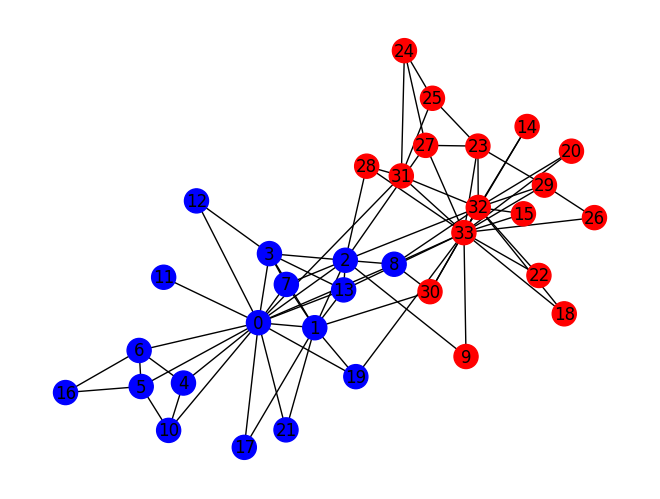

In [3]:
color_map = []
for node in G_karate.nodes():
    if G_karate.nodes[node]['club'] == 'Mr. Hi':
        color_map.append('blue')
    else:
        color_map.append('red')

nx.draw(G_karate, with_labels=True, node_color=color_map)
plt.show()

Ex 2: Write a function to compute the modularity of a graph partitioning (use equation 9.12 in the book). The function should take a networkX Graph and a partitioning as inputs and return the modularity.

In [4]:
def compute_modularity(G, communities):
    L = G.number_of_edges()
    modularity = 0
    for i in communities:
        Lc = 0
        kc = 0
        for node in i:
            degree = G.degree(node)
            kc += degree
        Lc = G.subgraph(i).number_of_edges()
        modularity += (Lc/L - ((kc/(2*L))**2))
    return modularity

Ex 3: Explain in your own words the concept of modularity.

Ex 4: Compute the modularity of the Karate club split partitioning using the function you just wrote. Note: the Karate club split partitioning is avilable as a node attribute, called "club".

In [5]:
# Define the communities function:
def comp_communities(G):
    officer = []
    mrHi = []
    club_dict = nx.get_node_attributes(G, name='club')
    for i in range(len(club_dict)):
        if club_dict[i] == 'Officer':
            officer.append(i)
        else:
            mrHi.append(i)
    return [list(officer),list(mrHi)]

In [6]:
print("Our modularity:", compute_modularity(G_karate, communities=comp_communities(G_karate)))

Our modularity: 0.3582347140039447


In [7]:
print("Networkx modularity:", nx.algorithms.community.modularity(G_karate, communities = comp_communities(G_karate)))

Networkx modularity: 0.39143756676224206


Ex 5: We will now perform a small randomization experiment to assess if the modularity you just computed is statitically different from 0. To do so, we will implement the double edge swap algorithm. The double edge swap algorithm is quite old... it was implemented in 1891 (!) by Danish mathematician Julius Petersen(https://en.wikipedia.org/wiki/Julius_Petersen). Given a network G, this algorithm creates a new network, such that each node has exactly the same degree as in the original network, but different connections. Here is how the algorithm works.

In [8]:
def double_swap(G, N):
    #Make a copy of the graph 
    H = G.copy() 
    
    for i in range(N): 
        
        #select two random edges from the graph H 
        #t, s = random.sample(H.edges(), 2)
        t = random.choice(list(H.edges()))
        s = random.choice(list(H.edges()))
        
        u, v = t
        x, y = s

        if len(set([u,v,x,y])) != 4:
            continue                   

        if (u != x) and (v != y) and (not H.has_edge(u, y)) and (not H.has_edge(x, v)):
            H.remove_edges_from([t, s])
            H.add_edges_from([(u, y), (x, v)])                                                

        print("Edge swapped between",u,"-",v,"and",x,"-",y)
    return H

In [9]:
H = double_swap(G_karate, G_karate.number_of_edges()*2)

Edge swapped between 0 - 5 and 1 - 19
Edge swapped between 5 - 6 and 24 - 25
Edge swapped between 8 - 30 and 6 - 16
Edge swapped between 0 - 4 and 14 - 32
Edge swapped between 20 - 32 and 8 - 16
Edge swapped between 2 - 28 and 20 - 33
Edge swapped between 2 - 7 and 24 - 27
Edge swapped between 5 - 25 and 0 - 11
Edge swapped between 2 - 27 and 24 - 31
Edge swapped between 30 - 33 and 0 - 6
Edge swapped between 4 - 14 and 18 - 33
Edge swapped between 22 - 33 and 26 - 29
Edge swapped between 22 - 33 and 6 - 24
Edge swapped between 26 - 29 and 0 - 25
Edge swapped between 1 - 30 and 31 - 33
Edge swapped between 0 - 7 and 6 - 30
Edge swapped between 0 - 3 and 5 - 10
Edge swapped between 29 - 33 and 22 - 24
Edge swapped between 0 - 8 and 2 - 13
Edge swapped between 2 - 3 and 5 - 10
Edge swapped between 4 - 6 and 0 - 31
Edge swapped between 0 - 1 and 2 - 8
Edge swapped between 3 - 5 and 8 - 16
Edge swapped between 23 - 25 and 27 - 33
Edge swapped between 6 - 7 and 8 - 33
Edge swapped between 0

Ex 6: Double check that your algorithm works well, by showing that the degree of nodes in the original network and the new 'randomized' version of the network are the same.

In [10]:
#Get the degree of each node in the original network and the randomized network:
original_degree = dict(G_karate.degree).items()
randomized_degree = dict(H.degree).items() 

# Check that the degrees are equal or not  
if original_degree == randomized_degree: 
    print("The degree of nodes in both networks are equal")
else:
    print("The degree of nodes in both networks are NOT equal")

The degree of nodes in both networks are equal


Ex 7: Create 1000 randomized version of the Karate Club network using the double edge swap algorithm you wrote in step 5. For each of them, compute the modularity of the "club" split and store it in a list.

In [11]:
mod_list = []
for i in range(1000):
    G_double = double_swap(G_karate, G_karate.number_of_edges()*2)
    communities = comp_communities(G_double)
    modularity = compute_modularity(G_double, communities=communities)
    mod_list.append(modularity)

Edge swapped between 9 - 33 and 1 - 19
Edge swapped between 15 - 32 and 2 - 8
Edge swapped between 0 - 4 and 9 - 19
Edge swapped between 5 - 16 and 28 - 33
Edge swapped between 22 - 32 and 24 - 27
Edge swapped between 0 - 4 and 23 - 27
Edge swapped between 23 - 25 and 1 - 7
Edge swapped between 4 - 10 and 1 - 33
Edge swapped between 20 - 32 and 1 - 25
Edge swapped between 2 - 27 and 1 - 13
Edge swapped between 1 - 13 and 4 - 6
Edge swapped between 2 - 7 and 13 - 33
Edge swapped between 23 - 32 and 4 - 33
Edge swapped between 4 - 13 and 0 - 19
Edge swapped between 2 - 27 and 32 - 33
Edge swapped between 0 - 17 and 15 - 32
Edge swapped between 0 - 27 and 2 - 32
Edge swapped between 1 - 21 and 14 - 32
Edge swapped between 25 - 31 and 19 - 33
Edge swapped between 23 - 29 and 31 - 32
Edge swapped between 30 - 33 and 26 - 29
Edge swapped between 14 - 33 and 0 - 6
Edge swapped between 2 - 3 and 31 - 33
Edge swapped between 8 - 32 and 15 - 17
Edge swapped between 2 - 28 and 1 - 21
Edge swapped

In [12]:
print(mod_list)

[0.050542406311637006, -0.0007396449704142605, -0.02638067061143992, -0.0007396449704142605, -0.0007396449704142605, -0.02638067061143992, 0.024901380670611373, -0.0007396449704142605, -0.052021696252465555, 0.024901380670611373, 0.024901380670611373, 0.050542406311637006, -0.0007396449704142605, -0.052021696252465555, 0.050542406311637006, 0.07618343195266267, -0.02638067061143992, -0.0007396449704142605, -0.02638067061143992, -0.052021696252465555, -0.0007396449704142605, 0.024901380670611373, -0.02638067061143992, -0.052021696252465555, 0.050542406311637006, 0.024901380670611373, -0.052021696252465555, -0.0007396449704142605, -0.0007396449704142605, -0.02638067061143992, 0.050542406311637006, -0.0007396449704142605, 0.024901380670611373, -0.0007396449704142605, -0.0007396449704142605, -0.052021696252465555, -0.02638067061143992, 0.050542406311637006, -0.052021696252465555, -0.02638067061143992, -0.02638067061143992, -0.0007396449704142605, -0.052021696252465555, -0.02638067061143992

Ex 8: Compute the average and standard deviation of the modularity for the random network.

In [13]:
# Compute the average and standard deviation of the modularity for the random network.
print("Average of random modulations:", np.mean(mod_list))
print("Standard Deviation of random modulation:", np.std(mod_list))

Average of random modulations: -0.002431952662721959
Standard Deviation of random modulation: 0.04460097026213075


Ex 9: Plot the distribution of the "random" modularity. Plot the actual modularity of the club split as a vertical line (use axvline).

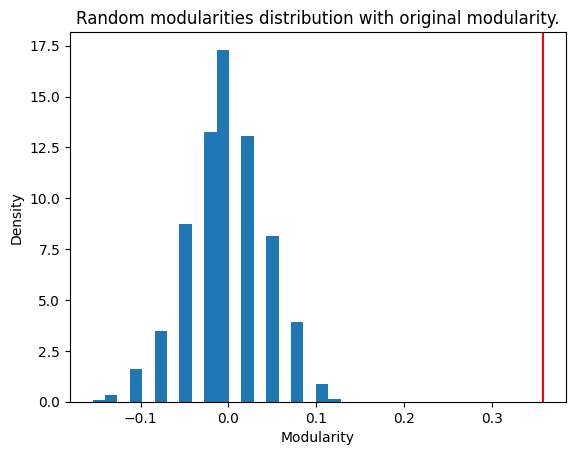

In [14]:
# Plot the distribution of the "random" modularity. Plot the actual modularity of the club split as a vertical line (use axvline).
plt.hist(mod_list, bins=20, density=True)
plt.axvline(compute_modularity(G_karate, communities=comp_communities(G_karate)), color='red')
plt.xlabel('Modularity')
plt.ylabel('Density')
plt.title('Random modularities distribution with original modularity.')
plt.show()

Ex 10: Comment on the figure. Is the club split a good partitioning? Why do you think I asked you to perform a randomization experiment? What is the reason why we preserved the nodes degree?

Ex 11: Use the Python Louvain-algorithm implementation to find communities in this graph. Report the value of modularity found by the algorithm. Is it higher or lower than what you found above for the club split? What does this comparison reveal?

In [15]:
louvain_com = nx.algorithms.community.louvain_communities(G_karate)
louvain_mod = nx.algorithms.community.modularity(G_karate, louvain_com)
print("Louvain modularity:", louvain_mod)

Louvain modularity: 0.4345214669889994


comment here:

Ex 12: Compare the communities found by the Louvain algorithm with the club split partitioning by creating a matrix D with dimension (2 times A), where A is the number of communities found by Louvain. We set entry D(i,j) to be the number of nodes that community i has in common with group split j. The matrix D is what we call a confusion matrix. Use the confusion matrix to explain how well the communities you've detected correspond to the club split partitioning.